## **IMPORT PACKAGES**

To install xgboost package: *!conda install -c conda-forge xgboost*

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## **READING PREPARED DATASET**

In [2]:
%%time
source = '/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data-Science-Master-project/DATA/traffic_data_complete.csv'
df = pd.read_csv(source,sep=',')

CPU times: user 14.8 s, sys: 1.79 s, total: 16.6 s
Wall time: 16.4 s


In [3]:
df.head()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion,Hora,Lat,Long,M30,URB,Mes,Dia,Minutos
0,1001,204,12,0,73,5,0,40.409729,-3.740786,1,0,1,1,0
1,1002,252,1,0,79,5,0,40.408029,-3.743760,1,0,1,1,0
2,1003,420,2,0,82,5,0,40.406824,-3.746834,1,0,1,1,0
3,1006,288,1,0,75,5,0,40.411894,-3.736324,1,0,1,1,0
4,1009,276,0,0,76,5,0,40.416233,-3.724909,1,0,1,1,0


In [4]:
df.sample(5)

,id,intensidad,ocupacion,carga,vmed,periodo_integracion,Hora,Lat,Long,M30,URB,Mes,Dia,Minutos
8458800,6643,499,1,14,80,15,20,40.475980,-3.674579,1,0,4,30,45
6256376,6639,132,3,5,62,15,3,40.491675,-3.671563,1,0,8,7,45
5981614,6879,636,1,0,70,5,22,40.391415,-3.678074,1,0,2,27,15
8917386,6779,5105,20,77,61,15,17,40.369997,-3.720305,1,0,5,11,45
8301246,3495,446,0,9,90,14,5,40.417544,-3.654574,1,0,4,27,0


In [5]:
df.dtypes

id                       int64
intensidad               int64
ocupacion                int64
carga                    int64
vmed                     int64
periodo_integracion      int64
Hora                     int64
Lat                    float64
Long                   float64
M30                      int64
URB                      int64
Mes                      int64
Dia                      int64
Minutos                  int64
dtype: object

## **TRAIN: SPLIT DATASET IN X (OBSERVATIONS) AND Y (TARGET)**

In [6]:
X=df.drop(['carga'],axis=1)

In [7]:
X.shape

(9740545, 13)

In [8]:
y=df['carga']

In [9]:
y.shape

(9740545,)

## **TEST: SPLIT SEPTEMBER-2018 DATASET IN X_test AND Y_test**

Before split the dataset, we are going to apply it a processing like in *Data Acquisition and Preparation.ipynb* is done for the data used in train. This can be checked in *Data Acquisition and Preparation_test.ipynb* notebook.

Loading the file

In [10]:
%%time
sourceTest='/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data-Science-Master-project/DATA/traffic_data_test_complete.csv'
df_test=pd.read_csv(sourceTest,sep=',')

CPU times: user 22.2 ms, sys: 30.3 ms, total: 52.5 ms
Wall time: 92.1 ms


In [11]:
df_test.head()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion,Hora,Lat,Long,M30,URB,Mes,Dia,Minutos
0,6679,2468.0,3.0,38.0,87.0,15,0,40.393663,-3.674823,1,0,9,1,0
1,6679,2488.0,4.0,37.0,87.0,15,0,40.393663,-3.674823,1,0,9,1,15
2,6679,2503.0,4.0,38.0,88.0,15,0,40.393663,-3.674823,1,0,9,1,30
3,6679,2140.0,3.0,32.0,88.0,15,0,40.393663,-3.674823,1,0,9,1,45
4,6679,2156.0,4.0,33.0,90.0,15,1,40.393663,-3.674823,1,0,9,1,0


In [12]:
df_test.shape

(10526, 14)

In [13]:
df_test.dtypes

id                       int64
intensidad             float64
ocupacion              float64
carga                  float64
vmed                   float64
periodo_integracion      int64
Hora                     int64
Lat                    float64
Long                   float64
M30                      int64
URB                      int64
Mes                      int64
Dia                      int64
Minutos                  int64
dtype: object

In [14]:
X_test=df_test.drop(['carga'],axis=1)

In [15]:
X_test.shape

(10526, 13)

In [16]:
y_test=df_test['carga']

In [17]:
y_test.shape

(10526,)

## **ML REGRESSION ALGORITHMS**

In our case, we have chosen to use Decission Tree Methods due to they have some interesting advantages:
- They are easy to understand.
- They require little data preparation.
- They are robust.
- They work good with large datasets


To achive to train heavier algorithms like Random Forest or XGBoost models with others parameters we have decided to do it in through **Google Colab** to have higher computacional capabilities. In notebook *Data Modeling Colab-full dataset.ipynb* we can found this procedure.

Once the model would have been trained, the best algorithm result is saving with joblib.dump() method. After that, the files are loaded here in order to predict with test dataset.

Here we have to say that we had computational limitations that triggered very high train times. This issue, joined to continuous server cuts that required the reconnections and to launch the process again, have done that the model parameters grid used to train has been very limited.

Here we summarize the results obtained in Google Colab Notebooke (*Data Modeling Colab-full dataset.ipynb*). Using GridSearchCV we look for the best parameters which give the best score.


- For **Decision Tree Regressor**:

 - min_samples_leaf:[10,20,30], max_depth:range(9,10). Time spent: 8min 2s. $MSE$=33.741, **$\sqrt{MSE}$=5.808** Best_params{'max_depth': 9, 'min_samples_leaf': 30}
     
 - min_samples_leaf:[10,20,30], max_depth:range(19,20). Time spent: 11min 22s. $MSE$=6.510, **$\sqrt{MSE}$=2.551** Best_params{'max_depth': 19, 'min_samples_leaf': 20}


- For **Random Forest Regressor**:

 - n_estimators=50, min_samples_leaf:[20,30], max_depth:range(19,20). Time spent: 4h 35min 38s. $MSE$=5.237, **$\sqrt{MSE}$=2.288** Best_params{'max_depth': 19, 'min_samples_leaf': 20}
     
 - n_estimators=100, min_samples_leaf:[20,30], max_depth:range(29,30). Time spent: 10h 2min 55s. $MSE$=3.979, **$\sqrt{MSE}$=1.994** Best_params{'max_depth': 29, 'min_samples_leaf': 20}
 
 
- For **XGBoost Regressor**:

 - n_estimators=50, min_samples_leaf:[20,30], max_depth:range(19,20). Time spent: 4h 55min 51s. $MSE$=8.799, **$\sqrt{MSE}$=2.966** Best_params{'max_depth': 19, 'min_samples_leaf': 20}

Look up the previous results, we can say:

 - **The Best Results, talking about model type is given by XGBoost and Randon Forest, as it was expected.**
 - **The Best Results is achieving by Random Forest with max_depth=29, min_samples_leaf=20 and n_estimators=100, giving a MSE of 3.979.**

This model is saved in Google Colab in order to be locally loaded next.

## **PREDICTING Y_test WITH RANDOM FOREST**

Loading the trained model with "joblib" package.

In [18]:
import pickle 
from sklearn.externals import joblib

In [19]:
#Specifying the file path
pkl_filename_route='/Users/antoniobravomunoz/Documents/DATA_SCIENCE_MASTER/TFM/Data-Science-Master-project/TrainedModels/randomforest2_colab.pkl'

In [20]:
#Loading the model
RFreg=joblib.load(pkl_filename_route)

In [21]:
RFreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=29,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Predicting target values.

We had a problem when we was going to make predictions. This issue, had been solved updating the sklearn version from 0.19.2 to 0.20.2. The base of this problem was that the enviroment, where the model has been trained (Google Colab), has the last version of this package, and in this local enviroment the version was not the same. 

To solve it, we did: *!pip install -U scikit-learn*

In [22]:
Ypredict=RFreg.predict(X_test)

### **RESULTS**

**Show the coefficient of determination ($R^2$). The best score is 1.**

In [23]:
R=RFreg.score(X_test, y_test)
R

0.9720606530911907

**Calculation of mean absolute errors.**

In [24]:
MAE=np.mean(abs(Ypredict - y_test))
print('Mean Absolute Error:', MAE)

Mean Absolute Error: 2.171006747074407


**Determining Performance Metrics: Accuracy.**

In [25]:
mape=100*(abs(Ypredict - y_test)/y_test)
accuracy=100-np.mean(mape)
print('Accuracy:', round(accuracy,3), '%')

Accuracy: 94.738 %


There is to say that a 94.7% of accuracy is a good result for our purpose.

**Importance of features on the model.**

In [26]:
importances = list(RFreg.feature_importances_)

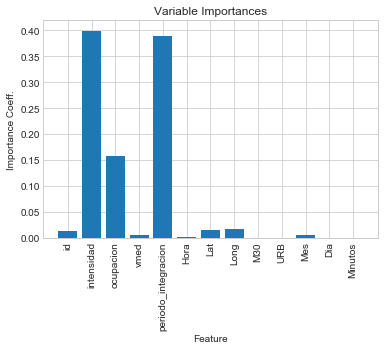

In [27]:
#style
plt.style.use('seaborn-whitegrid')
#X
x_values = list(range(len(importances)))
#Plot
plt.bar(x_values, importances, orientation = 'vertical')
#Tick labels for x axis
plt.xticks(x_values, list(X.columns), rotation='vertical')
#Axis labels and title
plt.ylabel('Importance Coeff.'); plt.xlabel('Feature'); plt.title('Variable Importances');

**Visualizing Data targets and Data predicted**

In [28]:
dfpredic=pd.DataFrame(y_test)

In [29]:
dfpredic.rename(columns={'carga':'carga_actual'},inplace=True)

In [30]:
dfpredic['prediccion']=Ypredict
dfpredic['Id']=X_test['id'].astype(str)
dfpredic['Date']='2018-'+X_test['Mes'].astype(str)+'-'+X_test['Dia'].astype(str)

Aggregation by Date to compute the average "carga" on the route for the detectors involved.

In [31]:
dfpredic2=dfpredic.groupby(dfpredic['Date']).mean().reset_index()

In [33]:
dfpredic2.dtypes

Date             object
carga_actual    float64
prediccion      float64
dtype: object

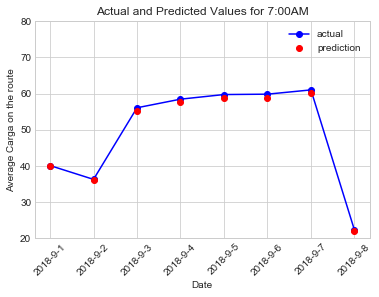

In [39]:
# Plot
plt.style.use('seaborn-whitegrid')
plt.plot(dfpredic2['Date'], dfpredic2['carga_actual'], 'bo-', label = 'actual')
plt.plot(dfpredic2['Date'], dfpredic2['prediccion'], 'ro', label = 'prediction')
plt.xticks(rotation = '45')
plt.ylim(20, 80)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Carga on the route')
plt.title('Actual and Predicted Values for 7:00AM')
#plt.savefig('/Users/antoniobravomunoz/Documents/GitHub/Data-Science-Master-project/Figures and visualizations/Avg_carga_actual-prediction.png')

Visualizing the error region around the prediction.

In [35]:
err=dfpredic2['carga_actual']-dfpredic2['prediccion']

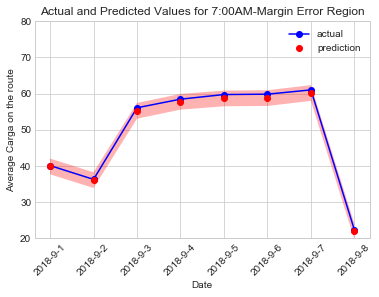

In [40]:
plt.style.use('seaborn-whitegrid')
plt.plot(dfpredic2['Date'], dfpredic2['carga_actual'], 'bo-', label = 'actual')
plt.plot(dfpredic2['Date'], dfpredic2['prediccion'], 'ro', label = 'prediction')
plt.fill_between(dfpredic2['Date'], dfpredic2['prediccion']-MAE, dfpredic2['prediccion']+MAE, facecolor='red', alpha=0.3)
plt.xticks(rotation = '45')
plt.ylim(20, 80)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Average Carga on the route')
plt.title('Actual and Predicted Values for 7:00AM-Margin Error Region')
#plt.savefig('/Users/antoniobravomunoz/Documents/GitHub/Data-Science-Master-project/Figures and visualizations/Avg_carga_actual-prediction-error.png')